<h1 align=center> Transformers (Attention Is All You Need) In Depth </h1>

Transformers, in the context of machine learning and artificial intelligence, refer to a type of deep learning model architecture designed primarily for natural language processing (NLP) tasks. They have revolutionized the field by enabling more effective training and performance on a variety of tasks such as translation, summarization, and question answering.

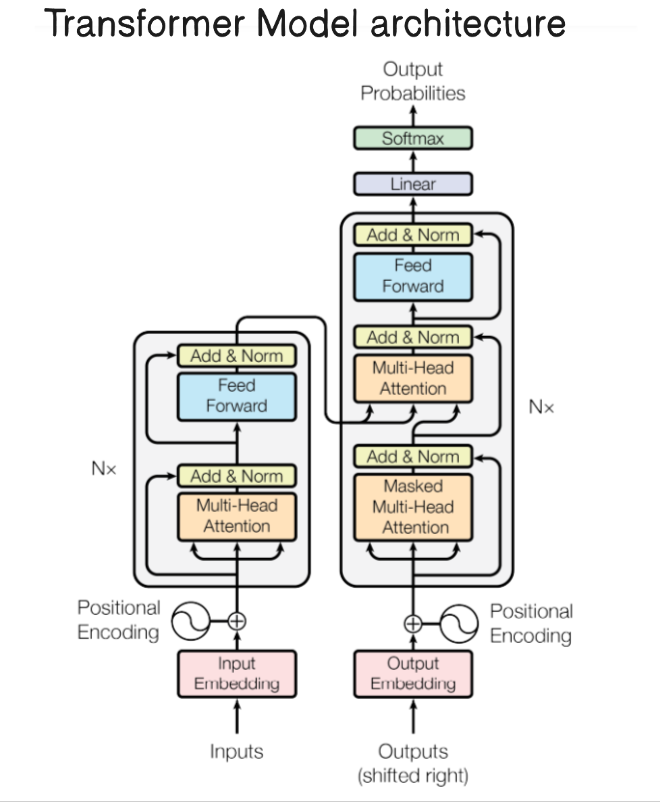

### 1. **Introduction and History**

- **Origins**: The transformer model was introduced in the paper "Attention Is All You Need" by Vaswani et al., published by Google Brain in 2017.
- **Impact**: Transformers have replaced recurrent neural networks (RNNs) and long short-term memory (LSTM) networks in many NLP tasks due to their efficiency and performance.

### 2. **Architecture Overview**

- **Attention Mechanism**: The core innovation of transformers is the self-attention mechanism, which allows the model to weigh the importance of different words in a sentence.
- **Encoder-Decoder Structure**: The original transformer model has an encoder-decoder structure. The encoder processes the input sequence, and the decoder generates the output sequence.
- **Parallelization**: Transformers can process all words in a sentence simultaneously, unlike RNNs which process sequentially, making training faster.

### 3. **Components of a Transformer**

- **Input Embeddings**: Converts words into vectors of real numbers.
- **Positional Encoding**: Adds information about the position of each word in the sentence, since transformers do not inherently understand order.
- **Multi-Head Self-Attention**: Allows the model to focus on different parts of the sentence simultaneously by using multiple attention mechanisms in parallel.
- **Feed-Forward Neural Networks**: Applied independently to each position to introduce non-linearity.
- **Layer Normalization**: Normalizes inputs to each layer to stabilize and accelerate training.
- **Residual Connections**: Helps with gradient flow and allows for deeper models by adding the input of each layer to its output.

### 4. **Self-Attention Mechanism**

- **Calculation**: Self-attention involves computing three vectors for each word - Query (Q), Key (K), and Value (V).
- **Scaled Dot-Product**: The dot product of the query and key vectors determines the attention scores, which are then scaled and passed through a SoftMax function to get attention weights.
- **Weighted Sum**: The attention weights are used to compute a weighted sum of the value vectors, producing the final output.

### 5. Transformer Practical Explanation

- Our goal is to translate French sentence to English.

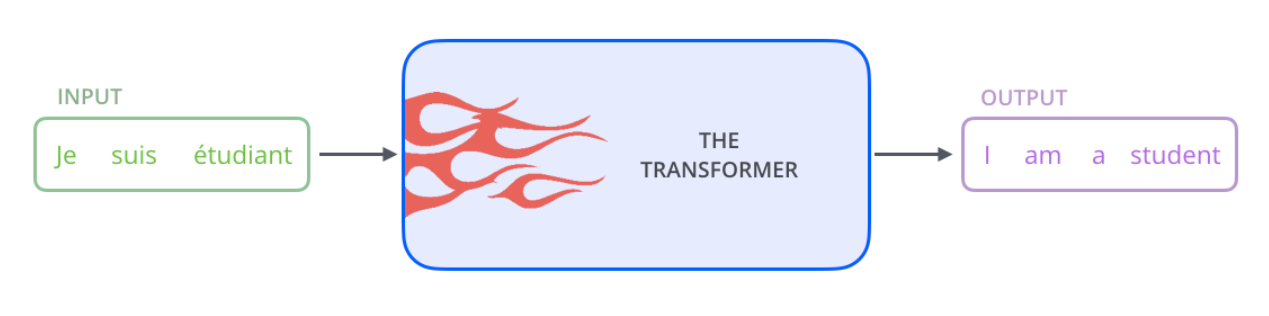

- If we open transformer architect, we find encoder and decoder.

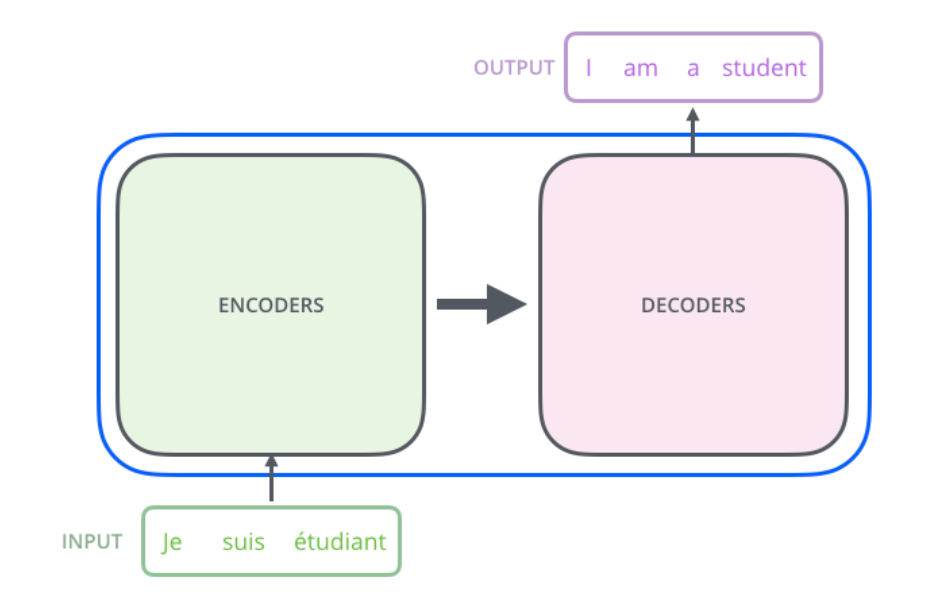

`Note`: To continue click on the link: [Jaylammar](https://jalammar.github.io/illustrated-transformer/)


### 6. **Popular Transformer Models**

- **BERT**: Designed for understanding the context of words in a sentence, enabling better performance on a variety of NLP tasks.
- **GPT**: Focuses on text generation, using a unidirectional approach where each word is predicted based on previous words.
- **T5**: Treats every NLP problem as a text-to-text problem, allowing for a unified approach to multiple tasks.
- **Transformer-XL**: Handles longer context by introducing recurrence.

### 7. **Advantages and Limitations**

- **Advantages**: High parallelization, effective handling of long-range dependencies, and superior performance on many benchmarks.
- **Limitations**: Large computational resources required, high memory usage, and complexity in understanding and interpreting model decisions.